In [1]:
from requests_html import HTMLSession
from urllib.parse import urljoin

s = HTMLSession() 
start = 'http://www.pythonchallenge.com/pc/def/0.html'
answers = [start]

def add_answer(url, n=None):
    if n is None:
        n = len(answers)
    last = answers[n-1]
    new = urljoin(last, url)
    try:
        answers[n] = new
    except IndexError:
        answers.append(new)
    print(f'answer {n}: {answers[n]}')

def get_comments(request):
    comments = request.html.xpath('//comment()')
    return [c.search('<!--{}-->')[0].strip() for c in comments]

# Puzzle 0: warming up

In [2]:
r = s.get(start)
print(r.html.text)
r = s.get(urljoin(start, f'{2**38}.html'))
print(r.text)
add_answer('map.html', 0)

warming up


Hint: try to change the URL address.
<html>
<head>
<title>Redirection</title>
<META HTTP-EQUIV="Refresh"
      CONTENT="0; URL=map.html">
</head>
<body>
</body>
</html>

answer 0: http://www.pythonchallenge.com/pc/def/map.html


# Puzzle 1: what about making trans? 

In [3]:
from string import ascii_lowercase as alphabet
r = s.get(answers[0])
print(r.html.text)

ciphertext = r.html.text.split('\n\n')[1].strip()

def rot(n, msg):
    return msg.translate(
        str.maketrans(alphabet, alphabet[n:] + alphabet[:n])
    )

print('\nROT-2\n', rot(2, ciphertext), '\n\n', sep='')
add_answer(f'{rot(2, "map")}.html', 1)

What about making trans?
everybody thinks twice before solving this.


g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj.



General tips:
Use the hints. They are helpful, most of the times.
Investigate the data given to you.
Avoid looking for spoilers.

Forums: Python Challenge Forums

ROT-2
i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url.


answer 1: http://www.pythonchallenge.com/pc/def/ocr.html


# Puzzle 2: ocr

In [4]:
import re
from collections import Counter
r = s.get(answers[1])

message, mess = get_comments(r)
print(message, '\n', mess[:200], '...', '\n')

codeword = ''.join(l for l, c in Counter(mess).items() if c == 1)
print(f'The codeword is "{codeword}"')

add_answer(f'{codeword}.html', 2)

find rare characters in the mess below: 
 %%$@_$^__#)^)&!_+]!*@&^}@[@%]()%+$&[(_@%+%$*^@$^!+]!&_#)_*}{}}!}_]$[%}@[{_@#_^{*
@##&{#&{&)*%(]{{([*}@[@&]+!!*{)!}{%+{))])[!^})+)$]#{*+^((@^@}$[**$&^{$!@#$%)!@(&
+^!{%_$&@^!}$_${)$_#)!({@!)(^}!*^&!$%_ ... 

The codeword is "equality"
answer 2: http://www.pythonchallenge.com/pc/def/equality.html


# Puzzle 3: re

In [5]:
r = s.get(answers[2])
print(r.html.text.split('\n\n')[1].strip(), '\n')

regex_pattern = re.compile(r'[^A-Z][A-Z]{3}([a-z])[A-Z]{3}[^A-Z]')
mess = get_comments(r)[0]
codeword = ''.join(regex_pattern.findall(mess))
print(f'The codeword is "{codeword}"')

add_answer(f'{codeword}.php', 3)

One small letter, surrounded by EXACTLY three big bodyguards on each of its sides. 

The codeword is "linkedlist"
answer 3: http://www.pythonchallenge.com/pc/def/linkedlist.php


# Puzzle 4: follow the chain

In [6]:
def get_nothing(**params):
    url = answers[3]
    r = s.get(answers[3], params=params)
    if 'Divide by two' in r.text:
        return params['nothing'] // 2
    match = r.html.search(r'the next {word} is {nothing:d}')
    if match:
        return int(match['nothing'])
    return r.text

In [7]:
nothing=12345

for n in range(1, 1000):
    nothing = get_nothing(nothing=nothing)
    if not isinstance(nothing, int):
        break
    print(f'{nothing:>5}', end=' ')
    if n % 16 == 0:
        print()

print(f'\nThe codeword is "{nothing}"')
add_answer(f'{nothing}', 4)

44827 45439 94485 72198 80992  8880 40961 58765 46561 13418 41954 46782 92730 89229 25646 74288 
25945 39876  8498 34684 62316 71331 59717 76893 44091 73241 19242 17476 39566 81293 25857 74343 
39410  5505 27104 54003 23501 21110 88399 49740 31552 39998 19755 64624 37817 43427 15115 44327 
 7715 15248 61895 54759 54270 51332 63481 12362 94476 87810  6027 47551 79498 81226  4256 62734 
25666 14781 21412 55205 65516 53535  4437 43442 91308  1312 36268 34289 46384 18097  9401 54249 
29247 13115 23053  3875 16044  8022 25357 89879 80119 50290  9297 30571  7414 30978 16408 80109 
55736 15357 80887 35014 16523 50286 34813 77562 54746 22680 19705 77000 27634 21008 64994 66109 
37855 36383 68548 96070 83051 58026 44726 35748 61287   559 81318 50443  1570 75244 56265 17694 
48033 56523 51253 85750 42760 11877 15962 75494 87283 40396 49574 82682 63579 37278 53548 66081 
67753 56337  3356 94525 89574  4413 82294 56060 95493 80865 66242 16065 62145 23147 83763 62381 
76841 91706  9268 64814 80809 

# Puzzle 5: peak hell

In [8]:
r = s.get(answers[4])
print(r.html.text, '\n', get_comments(r))

peak hell


pronounce it 
 ['peak hell sounds familiar ?']


In [9]:
import pickle
data = s.get(urljoin(answers[4], 'banner.p')).content
print('\n'.join(''.join(ch * num for ch, num in row) for row in pickle.loads(data)))
add_answer('channel.html', 5)

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

# Puzzle 6: now there are pairs

In [10]:
from io import BytesIO
from zipfile import ZipFile

r = s.get(urljoin(answers[5], 'channel.zip'))
zf = ZipFile(BytesIO(r.content))
contents = { fn.filename: zf.read(fn).decode() for fn in zf.filelist }
zf_comments = { info.filename: info.comment.decode() for info in zf.infolist() }

readme = contents['readme.txt']
print(readme)
answer = ''
nothing = re.search(r'\b\d+\b', readme)[0]
while nothing: 
    filename=f'{nothing}.txt'
    answer += zf_comments[filename]
    match = re.search('Next nothing is (.+)', contents[filename])
    nothing = match[1] if match else None
    
print(answer)
add_answer('oxygen.html', 6)

welcome to my zipped list.

hint1: start from 90052
hint2: answer is inside the zip

****************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 **************************************************************

answe

# Puzzle 7: smarty 

In [11]:
from PIL import Image

def getimg(url, url2=''):
    if not url.startswith('http'):
        url = urljoin(answers[-1], url)
    if url2:
        url = urljoin(url, url2)
    r = s.get(url)
    if r.status_code != 200:
        raise RuntimeError(f'{url} {r.status_code} {r.reason}')
    return Image.open(BytesIO(r.content))


smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121] 

answer 7: http://www.pythonchallenge.com/pc/def/integrity.html


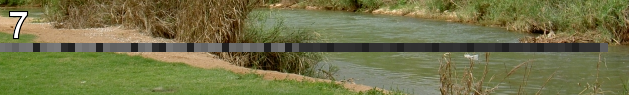

In [12]:
oxygen = getimg('oxygen.png')
strip = oxygen.crop(box=(0, oxygen.height//2 - 1, oxygen.width-20, oxygen.height//2))
msg = ''.join(chr(r) for r,g,b,a in list(strip.getdata())[::7])
print(msg, '\n')
codeword = ''.join(chr(int(n)) for n in re.findall(r'\d+', msg))
add_answer(f'{codeword}.html', 7)
oxygen

# Puzzle 8: working hard? 

In [13]:
r = s.get(answers[7])
print(r.html.text)
print('\n'.join(get_comments(r)))

working hard?






Where is the missing link?
un: 'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
pw: 'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'


In [14]:
import bz2
from ast import literal_eval

auth = {}
for part in 'un', 'pw':
    match = re.search(f"{part}: ('.*?')", r.text)
    cipher = literal_eval('b' + match[1])
    auth[part] = bz2.decompress(cipher).decode()
    
    
s.auth = tuple(auth.values())
print('basic auth:', s.auth)

add_answer('../return/good.html', 8)

basic auth: ('huge', 'file')
answer 8: http://www.pythonchallenge.com/pc/return/good.html


# Puzzle 9: connect the dots 

answer 9: http://www.pythonchallenge.com/pc/return/cow.html
hmm. it's a male.
answer 9: http://www.pythonchallenge.com/pc/return/bull.html


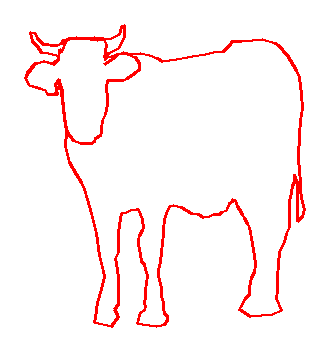

In [15]:
s.auth = ('huge', 'file')
from PIL import ImageDraw

def pairs(seq):
   return list(zip(seq[::2], seq[1::2]))

r = s.get(answers[8])

matches = re.findall(r'((?:\d+[,\s]*){4,})', r.text)
matches = [re.split(',\s*', m.strip()) for m in matches]
first, second = [pairs([int(n) for n in m]) for m in matches]

padding = 25
(left, right), (upper, lower) = [(min(dim)-padding, max(dim)+padding) for dim in zip(*first+second)]

canvas = Image.new('RGB', (1000, 1000), 'white')
d = ImageDraw.Draw(canvas)

for points in first, second:
    d.line(points, fill='red', width=3)
    
canvas = canvas.crop(box=(left, upper, right, lower))

add_answer('cow.html', 9)
print(s.get(answers[9]).html.text)
add_answer('bull.html', 9)
canvas

# Puzzle 10: what are you looking at... 

In [16]:
s.auth = ('huge', 'file')
r = s.get(answers[9])
print(r.html.text)
r = s.get(urljoin(answers[9], 'sequence.txt'))
print(r.text)

what are you looking at?






len(a[30]) = ?
a = [1, 11, 21, 1211, 111221, 



In [17]:
import itertools

def sequence(a=1):
    while True:
        yield a
        a = ''.join(f'{len(list(g))}{n}' for n, g in itertools.groupby(str(a)))
        
a30 = list(itertools.islice(sequence(), 31))[30]
print(f'length of 30th value is {len(a30)}')
add_answer(f'{len(a30)}.html', 10)

length of 30th value is 5808
answer 10: http://www.pythonchallenge.com/pc/return/5808.html


# Puzzle 11: odd even

answer 11: http://www.pythonchallenge.com/pc/return/evil.html


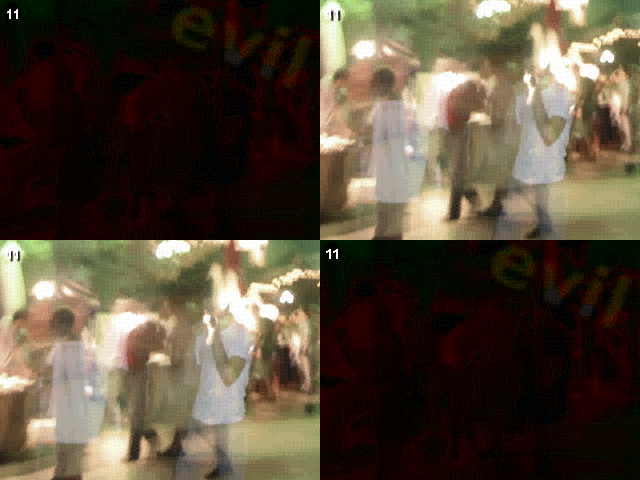

In [18]:
s.auth = ('huge', 'file')
cave = getimg(answers[10], 'cave.jpg')

pixels = list(cave.getdata())
cave.putdata(pixels[::2] + pixels[1::2])

add_answer('evil.html', 11)
cave

# Puzzle 12: dealing evil 

answer 12: http://www.pythonchallenge.com/pc/return/disproportional.html


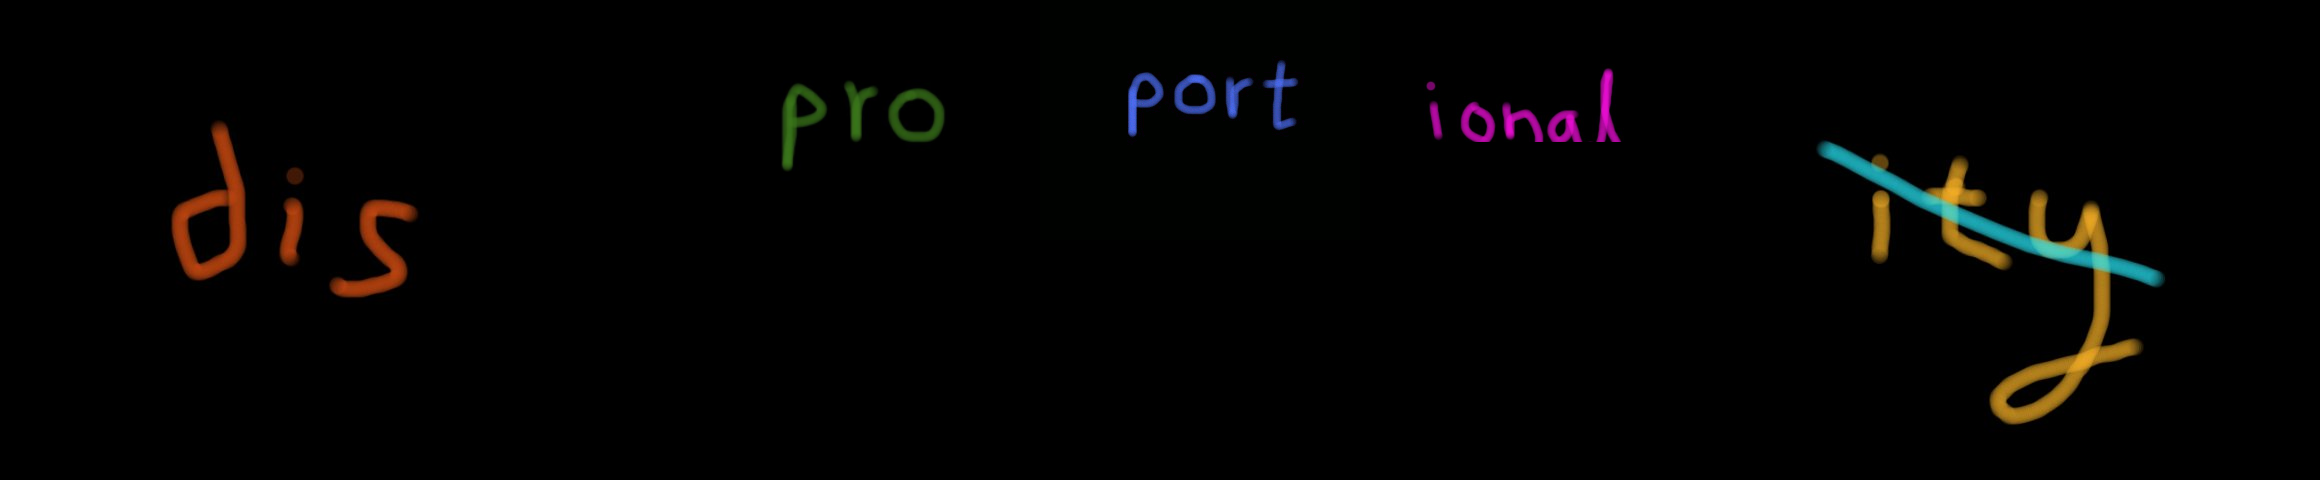

In [19]:
s.auth = ('huge', 'file')
# We need to do this, since image is trucated
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# some strange image format
r = s.get(urljoin(answers[11], 'evil2.gfx'))
canvas = Image.new('RGB', (5000, 5000))

height, width = 0, 0
for i in range(5):
    im = Image.open(BytesIO(r.content[i::5]))
    canvas.paste(im, (width, 0))
    width += im.width
    height = max(height, im.height)
    
canvas = canvas.crop((0, 0, width, height))
add_answer('disproportional.html', 12)
canvas

# Puzzle 13: call him 

In [20]:
s.auth = ('huge', 'file')
r = s.get(answers[12])
print(r.text)
print('evil4.jpg: :', s.get(urljoin(answers[12], 'evil4.jpg')).text)

<html>
<head>
  <title>call him</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
<center>
<img src="disprop.jpg" width="640" height="480" border="0" usemap="#evil" />
	<map name="evil">
		<area shape="circle" coords="326,177,45" href="../phonebook.php" />
	</map>
<font color="gold"/>
<br><b>
	phone that <remote /> evil
</br>
</html>

evil4.jpg: : Bert is evil! go back!



In [21]:
from xmlrpc.client import ServerProxy
phonebook = urljoin(answers[12], '../phonebook.php')
phone = ServerProxy(phonebook).phone

print(phone('Bert'))
add_answer('italy.html', 13)

555-ITALY
answer 13: http://www.pythonchallenge.com/pc/return/italy.html


# Puzzle 14: walk around

answer 14: http://www.pythonchallenge.com/pc/return/cat.html
uzi


and its name is uzi. you'll hear from him later.
answer 14: http://www.pythonchallenge.com/pc/return/uzi.html


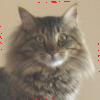

In [22]:
s.auth = ('huge', 'file')
wire = getimg(answers[13], 'wire.png')
canvas = Image.new('RGB', (100,100), 'blue')
data = list(wire.getdata())[::-1]
length = 100 
position = [100,0]
while length > 0:
    for n in range(length):
        position[0] -= 1
        canvas.putpixel(position, data.pop())
    length = length -1
    for n in range(length):
        position[1] += 1
        canvas.putpixel(position, data.pop())
    for n in range(length):
        position[0] += 1
        canvas.putpixel(position, data.pop())
    length = length -1
    for n in range(length):
        position[1] -= 1
        canvas.putpixel(position, data.pop())

add_answer('cat.html', 14)
print(s.get(answers[14]).html.text)
add_answer('uzi.html', 14)
canvas

# Puzzle 15: whom?

["he ain't the youngest, he is the second", 'todo: buy flowers for tomorrow']


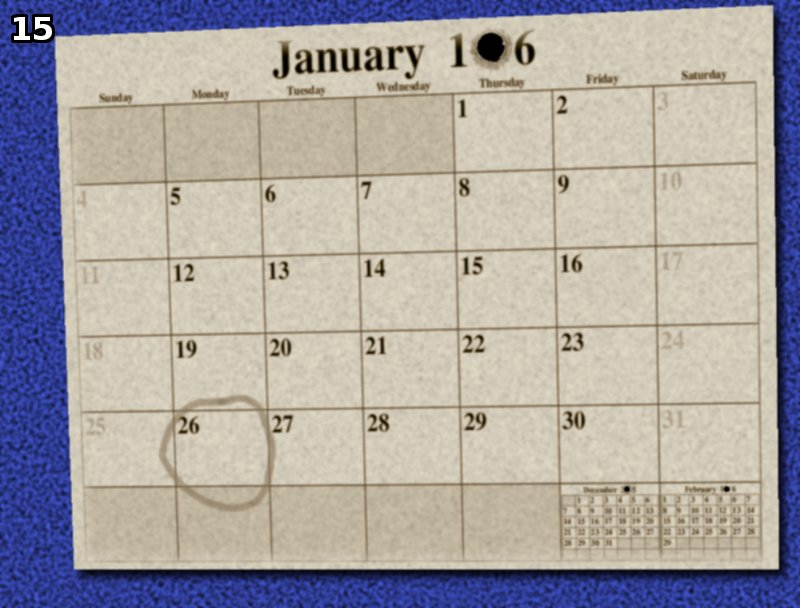

In [23]:
s.auth = ('huge', 'file')
r = s.get(answers[14])
print(get_comments(r))
calendar = getimg(answers[14], 'screen15.jpg')
calendar

In [24]:
from datetime import date
from calendar import isleap
def get_dates():
    for year in range(1006, 2000, 10):
        if isleap(year):
            # 'todo: buy flowers for tomorrow'
            dt = date(year=year, month=1, day=27) 
            if dt.weekday() == 1:
                yield dt
                

def on_the_day(date):
    url = f'https://en.wikipedia.org/wiki/{date.strftime("%B_%d")}'
    s = HTMLSession()
    r = s.get(url)
    year = date.strftime('%Y')
    for li in r.html.find('li'):
        if year in li.text:
            yield li.text
            
dt = list(get_dates())[-2] # "he ain't the youngest, he is the second"
print(dt, ' '.join(on_the_day(dt)))
print()
                
add_answer('mozart.html', 15)

1756-01-27 1756 – Wolfgang Amadeus Mozart, Austrian pianist and composer (d. 1791)

answer 15: http://www.pythonchallenge.com/pc/return/mozart.html


# Puzzle 16: let me get this straight 

answer 16: http://www.pythonchallenge.com/pc/return/romance.html


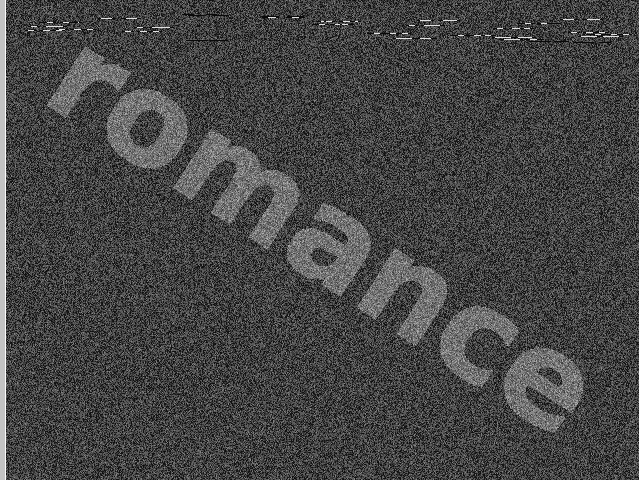

In [25]:
s.auth = ('huge', 'file')
from collections import Counter, deque 
from itertools import chain
mozart = getimg(answers[15], 'mozart.gif')
pixels = list(mozart.getdata())
data = []
for y in range(mozart.height):
    row = deque(pixels[y*mozart.width:(y+1)*mozart.width])
    row.rotate(-row.index(195))
    data.extend(row)

canvas = Image.new('L', (mozart.size))
canvas.putdata(data)
add_answer('romance.html', 16)
canvas

# Puzzle 17: eat? 

In [26]:
s.auth = ('huge', 'file')
r = s.get(answers[3])
print(r.cookies.get('info'))

you+should+have+followed+busynothing...


In [27]:
from urllib import parse

def get_busynothing(**params):
    url = answers[3]
    r = s.get(answers[3], params=params)
    if 'info' in r.cookies:
        info = r.cookies['info'].replace('+', ' ')
        message = parse.unquote_to_bytes(info) 
    else:
        message = b''
    match = r.html.search(r'the next {word} is {nothing:d}')
    if match:
        return int(match['nothing']), message
    return r.text, message

busynothing=12345
message = b''

for n in range(1, 1000):
    busynothing, msg = get_busynothing(busynothing=busynothing)
    message += msg
    if not isinstance(busynothing, int):
        break
    print(f'{busynothing:>5}', end =' ')
    if n % 16 == 0:
        print()
        
message = bz2.decompress(message).decode()
print()
print(message)

44827 45439 94485 72198 80992  8880 40961 58765 46561 13418 41954 46782 92730 89229 25646 74288 
25945 39876  8498 34684 62316 71331 59717 76893 44091 73241 19242 17476 39566 81293 25857 74343 
39410  5505 27104 54003 23501 21110 88399 49740 31552 39998 19755 64624 37817 43427 15115 44327 
 7715 15248 61895 54759 54270 51332 63481 12362 94476 87810  6027 47551 79498 81226  4256 62734 
25666 14781 21412 55205 65516 53535  4437 43442 91308  1312 36268 34289 46384 18097  9401 54249 
29247 13115 23053  3875 16044  8022 25357 89879 80119 50290  9297 30571  7414 30978 16408 80109 
55736 15357 80887 35014 16523 50286 34813 77562 54746 22680 19705 77000 27634 21008 64994 66109 
37855 36383 68548 96070 83051 
is it the 26th already? call his father and inform him that "the flowers are on their way". he'll understand.


In [28]:
print(phone('Leopold'))
print(s.get(urljoin(answers[16], 'violin.html')).html.text)

def call_leopold(message='hello'):
    _auth = s.auth
    s.cookies.set('info', message)
    s.auth = ('huge', 'file')
    url = 'http://www.pythonchallenge.com/pc/stuff/violin.php'
    html = s.get(url).html
    s.auth = _auth
    return html

print(call_leopold('the flowers are on their way').text)

add_answer('balloons.html', 17)

555-VIOLIN
no! i mean yes! but ../stuff/violin.php.
it's me. what do you want?





oh well, don't you dare to forget the balloons.
answer 17: http://www.pythonchallenge.com/pc/return/balloons.html


# Puzzle 18: can you tell the difference? 

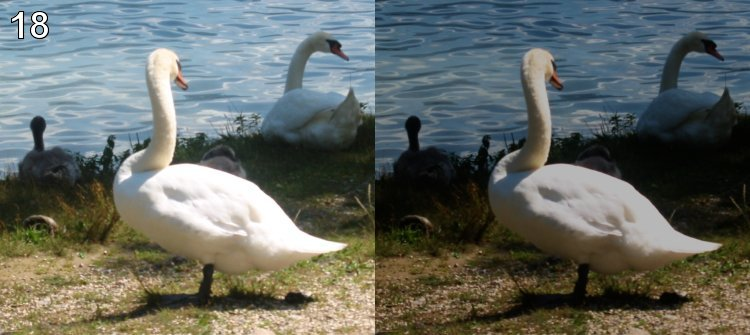

In [29]:
s.auth = ('huge', 'file')
balloons = getimg(answers[17], 'balloons.jpg')
balloons

In [30]:
r = s.get(urljoin(answers[17], 'brightness.html'))
print(r.text)

<html>
<head>
  <title>can you tell the difference?</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
	<br><br>
	<center>
	<font color="gold">
	<img src="balloons.jpg" border="0"/>
<!-- maybe consider deltas.gz -->
</body>
</html>



answer 18: http://www.pythonchallenge.com/pc/hex/bin.html


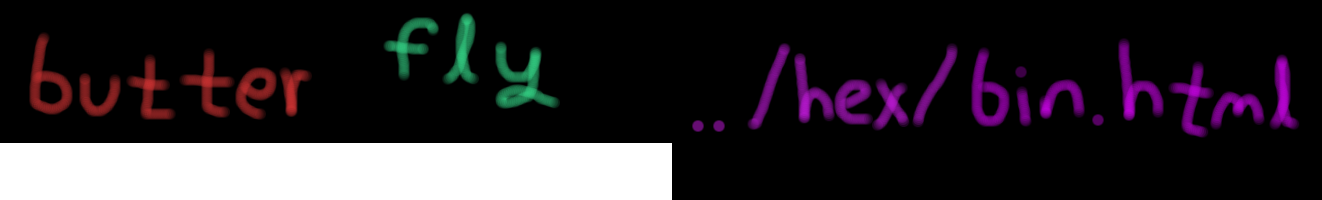

In [31]:
import gzip, difflib
content = s.get(urljoin(answers[17], 'deltas.gz')).content
gz = gzip.GzipFile(fileobj=BytesIO(content))
data = gz.read().decode().splitlines()
sides = list(zip(*((line[:53], line[56:]) for line in data)))
delta = {'+': [], '-': [], ' ': []}

for line in difflib.ndiff(*sides):
    delta[line[0]].append(line[2:]) 

canvas = Image.new('RGBA', (2000, 2000), (0,0,0,0))
for key, value in delta.items():
    data = bytes([int(x, 16) for x in ' '.join(value).split()])
    im = Image.open(BytesIO(data))
    left = 0 if not canvas.getbbox() else canvas.getbbox()[2]
    canvas.paste(im, (left,0))
add_answer('../hex/bin.html', 18)
canvas.crop(canvas.getbbox())

# Puzzle 19: please!

In [32]:
s.auth = ('butter', 'fly')
import email
r = s.get(answers[18])
leopolds_mail = re.findall(r'<!--\s*(.*)\s*-->', r.text, re.DOTALL)[0]

In [33]:
from IPython import display
import wave, email
msg = email.message_from_string(leopolds_mail)
audio = msg.get_payload(0).get_payload(decode=True)
blob = BytesIO()

with wave.open(BytesIO(audio)) as w0, wave.open(blob, 'wb') as w1:
    wave_params = w0.getparams()
    w1.setparams(wave_params)
    for i in range(w0.getnframes()):
        w1.writeframes(w0.readframes(1)[::-1])

leopold = urljoin(answers[18], 'idiot.html')
add_answer('idiot2.html', 19)
display.Audio(blob.getvalue())

answer 19: http://www.pythonchallenge.com/pc/hex/idiot2.html


# Puzzle 20: go away!

In [34]:
s.auth = ('butter', 'fly')
print(s.get(answers[19]).text)

<html>
<head>
  <title>go away!</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
	<br><br>
	<center>
	<font color="gold">
	<img src="unreal.jpg" border="0"/><br><br>
	but inspecting it carefully is allowed.
</body>
</html>



In [35]:
url = urljoin(answers[19], 'unreal.jpg')
request_headers = {}
fails = 0
s.auth = ('butter', 'fly')

while True:
    r = s.get(url, headers=request_headers)
    if r.ok:
        if len(r.content) < 1000:
            print(r.text.strip())
        elif r.status_code == 206:
            zipdata = r.content
            break
            
    content_range = r.headers.get('Content-Range')
    if content_range:
        start, end, length = map(int, re.match(r'bytes (\d+)-(\d+)/(\d+)', content_range).groups()) 
        hiding = re.search('hiding at (\d+)', r.text) 
        if hiding:
            pos = int(hiding[1])
        elif end + 1 == length:
            print(r.text[::-1].strip())
            pos = start - 1
        else:
            request_headers['Range'] = f'bytes={end+1}-'
            pos = end + 1
    else: 
        pos = length + 1
    request_headers['Range'] = f'bytes={pos}-'

add_answer(f'unreal.jpg', 20)

Why don't you respect my privacy?
we can go on in this way for really long time.
stop this!
invader! invader!
ok, invader. you are inside now.
esrever ni emankcin wen ruoy si drowssap eht
the password is your new nickname in reverse
and it is hiding at 1152983631.
answer 20: http://www.pythonchallenge.com/pc/hex/unreal.jpg


# Puzzle 21: Yes! This is really level 21 in here.  

In [36]:
s.auth = ('butter', 'fly')
import zipfile, zlib, bz2
import subprocess, tempfile

def identify(data):
    with tempfile.NamedTemporaryFile() as tmp:
        tmp.file.write(data)
        tmp.file.close()
        return subprocess.check_output(['file', tmp.name]).decode().strip().split(': ', 1)[1]
  
def unpack(data, last=''):
    print(last, end='')
    for d in data, data[::-1]:
        try: return unpack(zlib.decompress(d), 'z')
        except: pass
        try: return unpack(bz2.decompress(d), 'b')
        except: pass
        print()
                
    return(d.decode()) 
    
zf = zipfile.ZipFile(BytesIO(zipdata))

the_password = b'invader'[::-1]

with zf.open('readme.txt', pwd=the_password) as readme:
    print(readme.read().decode())
    
with zf.open('package.pack', pwd=the_password) as package:
    print(unpack(package.read()))
            
add_answer('copper.html', 21)

Yes! This is really level 21 in here. 
And yes, After you solve it, you'll be in level 22!

Now for the level:

* We used to play this game when we were kids
* When I had no idea what to do, I looked backwards.

zzzzzzbbbzzzzzzzzzzbbbzzzzzzbbbbbbbbzzzzbbbbbbbbzzzzbbbbbbbbbbzzbbbbbbbb
zzzzbbbbbbbzzzzzzbbbbbbbzzzzbbbbbbbbbzzzbbbbbbbbbzzzbbbbbbbbbzzzbbbbbbbbb
zzzbbzzzzzbbzzzzbbzzzzzbbzzzbbzzzzzzbbzzbbzzzzzzbbzzbbzzzzzzzzzzbbzzzzzzbb
zzbbzzzzzzzzzzzbbzzzzzzzbbzzbbzzzzzzbbzzbbzzzzzzbbzzbbzzzzzzzzzzbbzzzzzzbb
zzbbzzzzzzzzzzzbbzzzzzzzbbzzbbbbbbbbbzzzbbbbbbbbbzzzbbbbbbbbzzzzbbbbbbbbb
zzbbzzzzzzzzzzzbbzzzzzzzbbzzbbbbbbbbzzzzbbbbbbbbzzzzbbbbbbbbzzzzbbbbbbbbz
zzbbzzzzzzzzzzzbbzzzzzzzbbzzbbzzzzzzzzzzbbzzzzzzzzzzbbzzzzzzzzzzbbzzzbbz
zzzbbzzzzzbbzzzzbbzzzzzbbzzzbbzzzzzzzzzzbbzzzzzzzzzzbbzzzzzzzzzzbbzzzzbbz
zzzzbbbbbbbzzzzzzbbbbbbbzzzzbbzzzzzzzzzzbbzzzzzzzzzzbbbbbbbbbzzzbbzzzzzbbz
zzzzzzbbbzzzzzzzzzzbbbzzzzzzbbzzzzzzzzzzbbzzzzzzzzzzbbbbbbbbbbzzbbzzzzzzbb

look at your logs
answer 21: http://www.pytho

# Puzzle 22: emulate 

answer 22: http://www.pythonchallenge.com/pc/hex/bonus.html


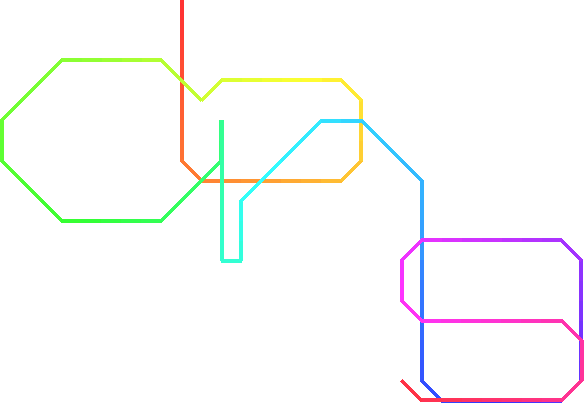

In [37]:
s.auth = ('butter', 'fly')
from PIL import ImageSequence
from PIL import ImageColor

whitegif = getimg(answers[21], 'white.gif')

def color_range(steps, h0=0, h1=360, saturation=100, lightness=60):
    stride = (h1 - h0) / steps
    for n in range(steps):
        hue = int(n*stride)
        hsl = f'hsl({hue}, {saturation}%, {lightness}%)'
        yield ImageColor.getrgb(hsl)
    

def track(image, start=(100,100), speed=3):
    x, y = start
    for frame in ImageSequence.Iterator(image):
        for point in ((x,y) for x in range(95, 105) for y in range(95, 105)):
                color = frame.getpixel(point)
                if color != 0:
                    x = x + (point[0] - 100) * speed
                    y = y + (point[1] - 100) * speed
                    yield(x, y)
                    break
                    
canvas = Image.new('RGBA', (1000, 1000))

path = list(track(whitegif, (canvas.width//2, canvas.height//2), 10))
colors = color_range(len(path))

d = ImageDraw.Draw(canvas)
for color, p0, p1 in zip(color_range(len(path)), path, path[1:]):
    d.line([p0, p1],color, 4)
     
add_answer('bonus.html', 22)
canvas.crop(canvas.getbbox()) 

# Puzzle 23: what is this module?

In [38]:
s.auth = ('butter', 'fly')
r = s.get(answers[22])
print(r.text)
last_comment = get_comments(r)[-1]
import this
print(this.s.translate(str.maketrans(this.d)), '\n')
print(last_comment, '->', rot(13, last_comment), '\n')
add_answer('ambiguity.html', 23)

<!--
TODO: do you owe someone an apology? now it is a good time to
tell him that you are sorry. Please show good manners although
it has nothing to do with this level.
-->
<html>
<head>
  <title>what is this module?</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
<center>
<br>
<br>
<img src="bonus.jpg"> 
<!-- 	it can't find it. this is an undocumented module. -->
</body>
</html>

<!--
'va gur snpr bs jung?'
-->

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may

# Puzzle 24: from top to bottom 

(641, 641)


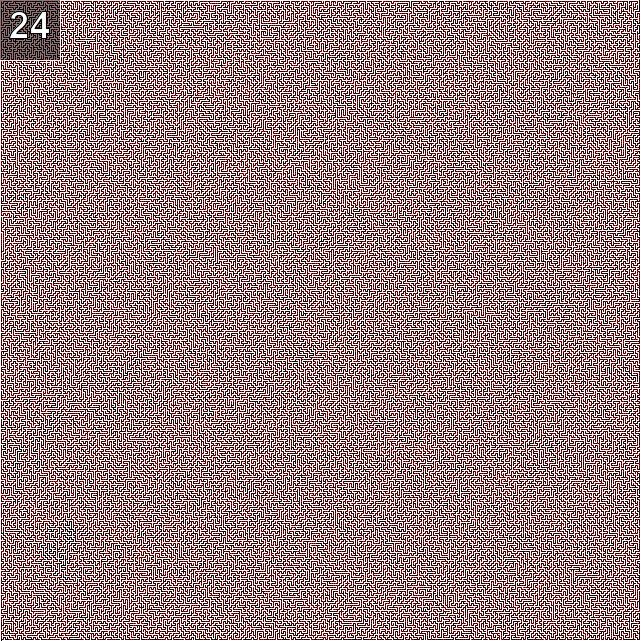

In [39]:
s.auth = ('butter', 'fly')
the_maze = getimg(answers[23], 'maze.png')
print(the_maze.size)
the_maze

In [40]:
import collections

COLOR = dict( 
    white = (255, 255, 255, 255),
    black = (255, 255, 255, 255),
    green = (0, 255, 0, 255),
    blue = (0, 0, 255, 255),
    yellow = (255, 255, 0, 255),
)

Point = collections.namedtuple('Point', 'x y')

def find_all_nonwhite_pixels(maze: Image) -> set:
    """find the coordinates of all non-white pixels in maze image"""
    
    black_points = set()
    for x in range(maze.width):
        for y in range(maze.height):
            point = Point(x, y)
            if maze.getpixel(point) == 0:
                black_points.add(point)
                   
    return black_points

def getdirections(p: Point, unexplored: set) -> tuple:
    return tuple({
        Point(p.x, p.y-1), 
        Point(p.x-1, p.y), 
        Point(p.x, p.y+1), 
        Point(p.x+1, p.y)
    } & unexplored)

def walk(point: Point, goal: Point, unexplored: set) -> list :
    unexplored.discard(point)
    path = [point]
    directions = getdirections(point, unexplored)
    if len(unexplored) % 100 == 0:
        print(point, len(unexplored), directions)
    if point == goal:
       return path 
    while len(directions) == 1:
        point = directions[0] 
        unexplored.discard(point)
        path.append(point)
        directions = getdirections(point, unexplored)
    for next_point in directions:
        path_to_goal = walk(next_point, goal, unexplored)
        if path_to_goal:
            return path + path_to_goal
    return [] 

red_maze, green_maze, *_ = the_maze.split()
unexplored = find_all_nonwhite_pixels(green_maze)
start, *_, goal = sorted(unexplored, key=lambda p: p.y)

In [41]:
import sys
sys.setrecursionlimit(2_000)
final_path = walk(start, goal, set(unexplored))

44623


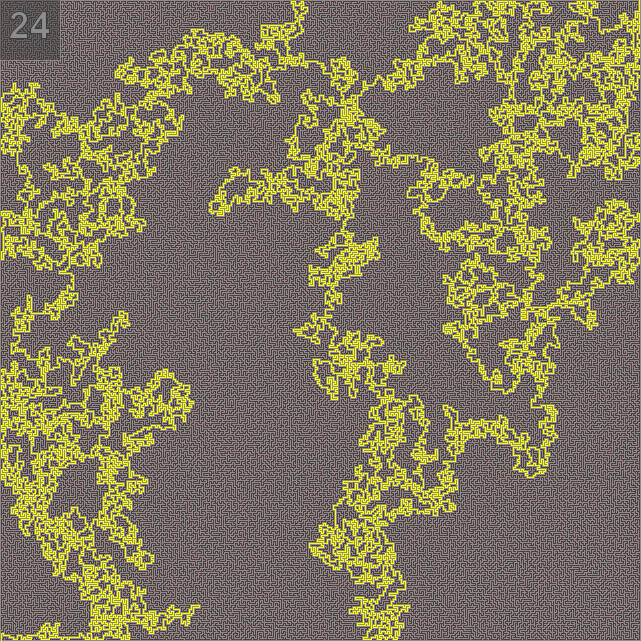

In [42]:
print(len(final_path))
maze_solution = Image.new('RGBA', the_maze.size, (0, 0, 0, 150))
for point in final_path:
    maze_solution.putpixel(point, (255, 255, 0, 255))
solved_maze = the_maze.copy()
solved_maze.paste(maze_solution, (0,0), maze_solution)
solved_maze

answer 24: http://www.pythonchallenge.com/pc/hex/lake.html


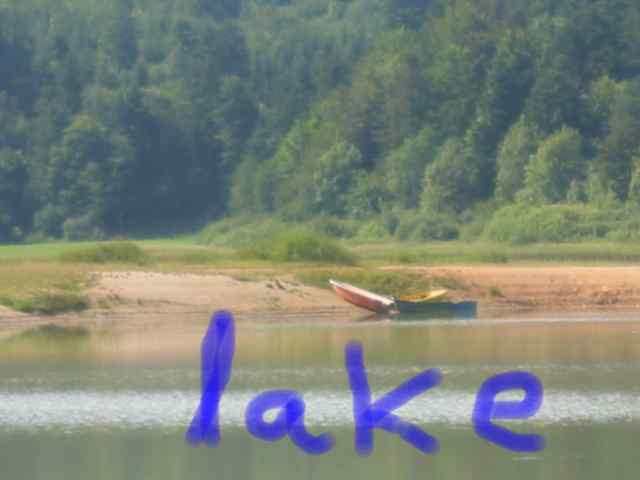

In [43]:
mazezip = bytes([red_maze.getpixel(point) for point in final_path][1::2])
zf = zipfile.ZipFile(BytesIO(mazezip))
with zf.open('maze.jpg') as fp:
    lake = Image.open(BytesIO(fp.read()))
with zf.open('mybroken.zip') as fp:
    broken = fp.read()  # We'll save this one for later
add_answer('lake.html', 24)
lake

# Puzzle 25: imagine how they sound

In [ ]:
s.auth = ('butter', 'fly')
print(s.get(answers[24]).html.html)
getimg(answers[24], 'lake1.jpg')

<html>
<head>
  <title>imagine how they sound</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
<center>
<br>
<br>
<img src="lake1.jpg"> <!-- can you see the waves? -->
</body>
</html>



In [ ]:
from math import ceil

def stitch_images(images, columns=10):
    """Stitch images together in a grid"""
    # use max width / height of input images as tile size
    width, height = map(max, zip(*(im.size for im in images)))
    canvas_size = width * columns, height * ceil(len(images) / columns) 
    canvas = Image.new('RGBA', canvas_size)
    for index, letter in enumerate(images):
        paste_box = (width * (index % columns), height * (index // columns))
        canvas.paste(letter, paste_box)
    return canvas

def solve_25():
    puzzle_pieces = []
    for n in range(0,25):
        url = urljoin(answers[24], f'lake{n+1}.wav')
        r = s.get(url)
        with wave.open(BytesIO(r.content)) as wav:
            imgdata = wav.readframes(wav.getnframes())
        piece = Image.frombytes('RGB', (60, 60), imgdata)
        puzzle_pieces.append(piece)
    return stitch_images(puzzle_pieces, 5)

solution = solve_25()  # it says 'decent'
add_answer('decent.html', 25)
solution

# Puzzle 26: be a man - apologize

In [ ]:
s.auth = ('butter', 'fly')
print(s.get(answers[25]).text)

In [ ]:
leopolds_address=leopolds_mail.splitlines()[0]
leopolds_answer="""
Never mind that.

Have you found my broken zip?

md5: bbb8b499a0eef99b52c7f13f4e78c24b

Can you believe what one mistake can lead to?
"""
print(leopolds_address, leopolds_answer)
checksum = re.search(r'[0-9a-f]{32}', leopolds_answer)[0]

In [ ]:
from hashlib import md5
def fix_zip(broken):
    for index in range(len(broken)):
        fixed = bytearray(broken)
        for char in range(256):
            fixed[index] = char
            digest = md5(fixed).hexdigest()
            if digest == checksum:
                return zipfile.ZipFile(BytesIO(fixed))
        
        
fixedzip = fix_zip(broken)
with fixedzip.open(fixedzip.filelist[0].filename) as fp:
    fixedgif = Image.open(BytesIO(fp.read()))
add_answer('speedboat.html', 26)
fixedgif

# Puzzle 27: between the tables

In [ ]:
s.auth = ('butter', 'fly')
print(s.get(answers[26]).text)
zigzag = getimg(answers[26],'zigzag.gif')
zigzag

In [ ]:
import keyword

d0 = list(zigzag.getdata())
d1 = list(zigzag.convert('L').getdata())
diffs = [pair for pair in zip(range(len(d0)), d0[1:], d1) if pair[1] != pair[2]]
words = bz2.decompress(bytes([b for a,b,c in diffs])).decode().split()

In [ ]:
py2keywords = set(keyword.kwlist + ['exec', 'print']) 
print(set(words) - py2keywords)

s.auth = ('repeat', 'switch')
add_answer('../ring/bell.html', 27)

# Puzzle 28:  many pairs ring-ring

In [ ]:
s.auth = ('repeat', 'switch')
print(s.get(answers[27]).text)
bell = getimg(answers[27], 'bell.png')
bell

In [ ]:
pairs = lambda seq : zip(seq[::2], seq[1::2])

green = list(bell.getchannel(1).getdata())
diffs = (a-b for a, b in pairs(green))
print(''.join(chr(x) for x in map(abs, diffs) if x != 42))

# This is unobvious
whodunnit = lambda: 'Guido van Rossum'.lower()
print(whodunnit().split()[0])
add_answer('guido.html', 28)

# Puzzle 29: silence!

In [ ]:
s.auth = ('repeat', 'switch')
# secret message in number of spaces in "blank" lines
print(bz2.decompress(bytes(len(line) for line in s.get(answers[28]).text.splitlines() if not line.strip())).decode())
add_answer('yankeedoodle.html', 29)

# Puzzle 30: relax you are on 30

In [ ]:
s.auth = ('repeat', 'switch')
r = s.get(answers[29].replace('.html', '.csv'))
csv_data = [float(num) for num in re.findall(r'[0-9.]+', r.text)]

In [ ]:
import struct
# Convert csv data it to sound?
blob = BytesIO()
with wave.open(blob, 'w') as w:
    w.setnchannels(1)
    w.setsampwidth(2)
    w.setframerate(44100 / 8)
    for number in csv_data:
        value = int((0.5 - number) * 2 ** 16)
        data = struct.pack('<h', value)
        w.writeframes(data)

display.Audio(blob.getvalue())

In [ ]:
def factorize_2(num):
    for n in range(2, int(num**0.5)+1):
        if num % n == 0:
            yield (num // n, n)
            
height, width = next(factorize_2(len(csv_data)))
canvas = Image.new('L', (width, height))
for i, val in enumerate(csv_data):
    x, y = i % width, i // width
    canvas.putpixel((x, y), int(val * 255))
canvas.transpose(Image.TRANSPOSE)

In [ ]:
def secret_solution(x, i):
    try:
        a = f'{x[i]:.7f}'
        b = f'{x[i+1]:.7f}'
        c = f'{x[i+2]:.7f}'
        return chr(int(a[5]+b[5]+c[6]))
    except IndexError:
        return ''
    
print(''.join(secret_solution(csv_data, i) for i in range(0, 1000, 3)))
add_answer('grandpa.html', 30)

# Puzzle 31: where am I?

In [ ]:
s.auth=('kohsamui', 'thailand')
url = urljoin(answers[30], '../rock/grandpa.html')
r = s.get(url)
print(r.text)

In [ ]:
mandelbrot = getimg(url, 'mandelbrot.gif')
mandelbrot

In [ ]:
# zoomed out: left, top, width, height, iterations = -2, -1, 3, 9 / 4, 128
left, top, width, height, iterations = 0.34, 0.57, 0.036, 0.027, 128

def mandelbrot_iterate(c, iterations=128):
    zn = 0
    limit = 2 
    for i in range(iterations):
        zn = zn**2 + c
        if abs(zn) > limit:
            return i
    return i

canvas = mandelbrot.copy()

data = []
diffs = []
pixels = iter(mandelbrot.getdata())
for y in range(canvas.height)[::-1]:
    for x in range(canvas.width):
        ci = top + height * (y / canvas.height)
        cr = left + width * (x / canvas.width)
        val1 = mandelbrot_iterate(cr + ci * 1j)
        val0 = next(pixels)
        diffs.append(val1 - val0)
        data.append(val1)
                 
canvas.putdata(data)
canvas

In [ ]:
pixels = [dd > 0 for dd in diffs if dd]
h, w = next(factorize_2(len(pixels)))

message = Image.new('1', (w, h))
message.putdata(pixels)
message = message.resize((w * 5, h * 5))
#https://en.wikipedia.org/wiki/Arecibo_message
add_answer(urljoin(url, 'arecibo.html'), 31)
message

# Puzzle 32: etch-a-sketch

In [ ]:
s.auth=('kohsamui', 'thailand')
print(s.get(answers[31]).text)

In [ ]:
import itertools
import functools
from pprint import pprint

def parse_txtfile(txt):
    for section in re.split(r'#.*', txt.strip(), re.M):
        if section.strip():
            yield [[int(n) for n in line.split()] for line in section.splitlines() if line]

def get_valid(dim, length):
    for ax in dim:
        valid = set(combinations(tuple(ax), length))
        yield valid
        
@functools.lru_cache()
def combinations(row, length):
    if len(row) == 0:
        return [1] * length
    row = row[::-1]
    nonblanks = [([0] * section) + [1] for section in row]
    nonblanks[-1].pop()
    blank_sections = len(row) + 1
    free_blank = length - sum(row) - blank_sections + 2
    valid = set()
    for combo in itertools.combinations_with_replacement(list(range(blank_sections)), free_blank):
        output = []
        index = 0
        for gapindex, grouper in itertools.groupby(combo):
            while gapindex > index:
                output.extend(nonblanks[index])
                index += 1
            output.extend([1 for g in grouper])
        for i in range(index, len(row)):
            output.extend(nonblanks[i])
        valid.add(tuple(output[::-1]))
    return valid
        
def solve(horizontal, vertical):
    rows_valid = list(get_valid(horizontal, len(vertical)))
    columns_valid = list(get_valid(vertical, len(horizontal)))
    grid = [[None] * len(columns_valid) for _ in range(len(rows_valid))]
    pruned = 1
    while pruned:
        pruned = 0
        for ax in rows_valid, columns_valid:
            pruned += prune(ax, grid)
            for x, col in enumerate(ax):
                for y, cell in enumerate(zip(*col)):
                    if all(cell):
                        grid[x][y] = 1
                    elif not any(cell):
                        grid[x][y] = 0 
            # transpose grid
            grid = list(map(list, zip(*grid)))
    return grid
        
def prune(ax, grid):
    pruned = 0
    for valids, pattern in zip(ax, grid):
        for i, c in enumerate(pattern):
            if c is None:
                continue
            for v in list(valids):
                if v[i] != c:
                    valids.remove(v)
                    pruned += 1
    return pruned
            
def solution_as_image(grid, pixel_size=10):
    dims = len(grid[0]), len(grid)
    canvas = Image.new('1', dims)
    data = list(itertools.chain(*grid))
    canvas.putdata(data)
    return canvas.resize((dims[0]*pixel_size, dims[1]*pixel_size))


In [ ]:
warmup = list(parse_txtfile(s.get(urljoin(answers[31], 'warmup.txt')).text))[1:]
solution_as_image(solve(*warmup))

In [ ]:
up = list(parse_txtfile(s.get(urljoin(answers[31], 'up.txt')).text))[1:]
solution_as_image(solve(*up))

In [ ]:
add_answer('python.html', 32)
print(s.get(answers[32]).html.text)
add_answer('beer.html', 32)

# Puzzle 33: 33 bottles of beer

In [ ]:
s.auth=('kohsamui', 'thailand')
print(s.get(answers[32]).text)

In [ ]:
beer2 = getimg(urljoin(answers[32], 'beer2.png'))
beer2

In [ ]:

def solve_33(image, letter_size=100, columns=8):
    """Solve puzzle 33"""
    letters = []
    imdata = list(image.getdata())
    while len(imdata):
        brightest = max(imdata)  # brightest color
        root = int(len(imdata) ** 0.5)   
        if root ** 2 == len(imdata): # is it a "fair and square"
            letter = Image.new('L', (root, root))
            # enhance brightest pixels
            enhanced = [255 if p == brightest else p for p in imdata]
            letter.putdata(enhanced)
            topleft = (root // 2 - letter_size // 2)  # top left corner of cropped letter
            cropsize = (topleft, topleft, topleft + letter_size, topleft + letter_size)
            letters.append(letter.crop(cropsize))
        # If you are blinded by the light ...
        # remove its power, with its might
        imdata = [p for p in imdata if p != brightest]  # remove brightest pixels
    return stitch_images(letters, columns)

solution = solve_33(image=beer2, letter_size=60, columns=11)
add_answer('gremlins.html', 33)
solution

# The end

In [ ]:
s.auth=('kohsamui', 'thailand')
print(s.get(answers[33]).html.text)